<a href="https://colab.research.google.com/github/KietHuynh02/ANN_cifar10/blob/main/ANN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

so:[3]


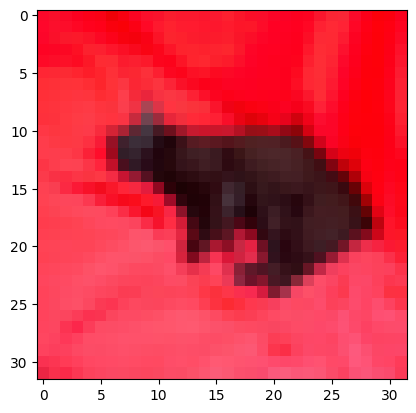

In [5]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
import matplotlib.pyplot as plt
img = x_train[21]
plt.imshow(img, cmap = plt.cm.binary)
plt.show
print('so:{}' .format(y_train[21]))

In [6]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [7]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(512,activation='relu', input_shape = (32*32*3,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train = x_train.reshape((50000, 32*32*3,1))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 32*32*3,1))
x_test = x_test.astype('float32')/255

In [9]:
from keras.utils import to_categorical 
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train,epochs = 50, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Do chinh xac tren tap kiem tra', test_acc)
print('Hàm mất mát tren tap kiem tra', test_loss)
     

Epoch 1/50
391/391 [==============================] - 16s 40ms/step - loss: 0.8652 - accuracy: 0.6957
Epoch 2/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8499 - accuracy: 0.6976
Epoch 3/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8417 - accuracy: 0.7023
Epoch 4/50
391/391 [==============================] - 13s 34ms/step - loss: 0.8373 - accuracy: 0.7032
Epoch 5/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8300 - accuracy: 0.7073
Epoch 6/50
391/391 [==============================] - 14s 37ms/step - loss: 0.8204 - accuracy: 0.7096
Epoch 7/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8170 - accuracy: 0.7131
Epoch 8/50
391/391 [==============================] - 13s 34ms/step - loss: 0.8071 - accuracy: 0.7128
Epoch 9/50
391/391 [==============================] - 13s 33ms/step - loss: 0.8091 - accuracy: 0.7156
Epoch 10/50
391/391 [==============================] - 13s 33ms/step - loss: 0.795

In [13]:
classes_keys = {0: 'airplane', 1: 'automobile', 2: 'bird',
                3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog',
                7: 'horse', 8: 'ship', 9: 'truck'}

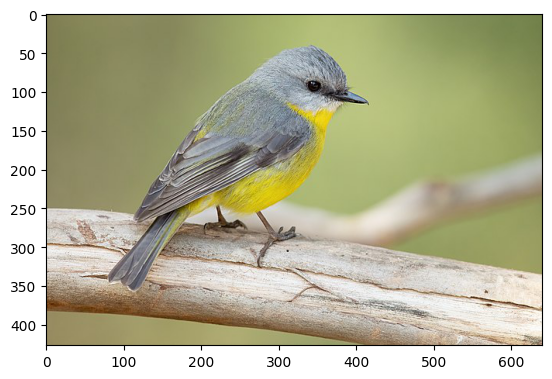

In [22]:
from keras.utils import load_img
url = 'bird.jpg'
img1 = load_img(url)
plt.imshow(img1)
     

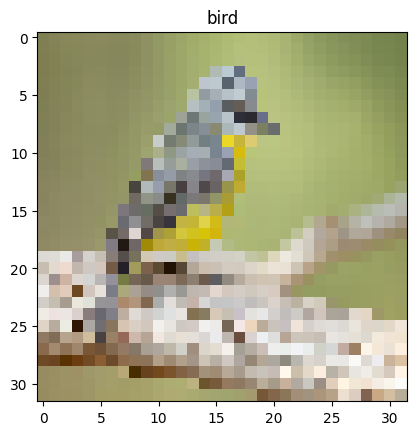

In [23]:
from keras.utils import load_img, img_to_array
import numpy as np
img1 = load_img(url, target_size=(32,32))
plt.imshow(img1)

# From image to array to predict
img1 = img_to_array(img1)
img1 = img1.astype('float32')
img1 = img1/255
pred_value = np.argmax(model.predict(img1.reshape(1, 32*32*3), verbose=False),)

# Check the class
for keys in classes_keys.keys():
  if pred_value == keys:
    plt.title(classes_keys[keys])
    break
  else:
    continue